# Image classification using TensorFlow

### Springboard Career Track Capstone Project 2

#### Linear Model in TensorFlow

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.pylabtools import figsize
figsize(12, 8)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


#### Import data

Data acquired from https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
import tarfile
tar = tarfile.open("cifar-10-python.tar.gz")
tar.extractall()
tar.close()

#### Create function to unpickle data

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """  
    from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
    encoder = LabelBinarizer()
    encoder.fit(range(10))

    return encoder.transform(x)

#### Assign batch names, unpickle batches, and concatenate

In [5]:
f1 = 'cifar-10-batches-py/data_batch_1'
f2 = 'cifar-10-batches-py/data_batch_2'
f3 = 'cifar-10-batches-py/data_batch_3'
f4 = 'cifar-10-batches-py/data_batch_4'
f5 = 'cifar-10-batches-py/data_batch_5'
x_test = 'cifar-10-batches-py/test_batch'
label_names = 'cifar-10-batches-py/batches.meta'

In [6]:
b1 = unpickle(f1)

In [7]:
b1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [8]:
train_y1 = b1.get(b'labels')
b1data = b1.get(b'data')

b2 = unpickle(f2)
train_y2 = b2.get(b'labels')
b2data = b2.get(b'data')

b3 = unpickle(f3)
train_y3 = b3.get(b'labels')
b3data = b3.get(b'data')

b4 = unpickle(f4)
train_y4 = b4.get(b'labels')
b4data = b4.get(b'data')

b5 = unpickle(f5)
train_y5 = b5.get(b'labels')
b5data = b5.get(b'data')

x_train = np.concatenate((b1data, b2data, b3data, b4data, b5data), axis=0)
y_train = np.concatenate((train_y1, train_y2, train_y3, train_y4, train_y5), axis=0)

y_train_cls = y_train
y_train = one_hot_encode(y_train)

test = unpickle(x_test)
x_test = test.get(b'data')
y_test_cls = test.get(b'labels')
y_test = one_hot_encode(y_test_cls)
label_names = unpickle(label_names)

In [9]:
x_train.shape

(50000, 3072)

In [10]:
x_train

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ..., 
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)

In [11]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [12]:
y_train.shape

(50000, 10)

In [13]:
label_names

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [14]:
x_test.shape

(10000, 3072)

In [15]:
y_test.shape

(10000, 10)

In [16]:
x_train, x_test

(array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 35,  40,  42, ...,  77,  66,  50],
        [189, 186, 185, ..., 169, 171, 171],
        [229, 236, 234, ..., 173, 162, 161]], dtype=uint8),
 array([[158, 159, 165, ..., 124, 129, 110],
        [235, 231, 232, ..., 178, 191, 199],
        [158, 158, 139, ...,   8,   3,   7],
        ..., 
        [ 20,  19,  15, ...,  50,  53,  47],
        [ 25,  15,  23, ...,  80,  81,  80],
        [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8))

In [17]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [18]:
x_train

array([[ 0.23137255,  0.16862745,  0.19607843, ...,  0.54901961,
         0.32941176,  0.28235294],
       [ 0.60392157,  0.49411765,  0.41176471, ...,  0.54509804,
         0.55686275,  0.56470588],
       [ 1.        ,  0.99215686,  0.99215686, ...,  0.3254902 ,
         0.3254902 ,  0.32941176],
       ..., 
       [ 0.1372549 ,  0.15686275,  0.16470588, ...,  0.30196078,
         0.25882353,  0.19607843],
       [ 0.74117647,  0.72941176,  0.7254902 , ...,  0.6627451 ,
         0.67058824,  0.67058824],
       [ 0.89803922,  0.9254902 ,  0.91764706, ...,  0.67843137,
         0.63529412,  0.63137255]])

In [19]:
x_test

array([[ 0.61960784,  0.62352941,  0.64705882, ...,  0.48627451,
         0.50588235,  0.43137255],
       [ 0.92156863,  0.90588235,  0.90980392, ...,  0.69803922,
         0.74901961,  0.78039216],
       [ 0.61960784,  0.61960784,  0.54509804, ...,  0.03137255,
         0.01176471,  0.02745098],
       ..., 
       [ 0.07843137,  0.0745098 ,  0.05882353, ...,  0.19607843,
         0.20784314,  0.18431373],
       [ 0.09803922,  0.05882353,  0.09019608, ...,  0.31372549,
         0.31764706,  0.31372549],
       [ 0.28627451,  0.38431373,  0.38823529, ...,  0.36862745,
         0.22745098,  0.10196078]])

Using Keras (adapted from https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html)

Using baseline model Keras example from https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [ ]:
import tensorflow as tf
sess = tf.Session()

# from keras import backend as K
# K.set_session(sess)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.utils

In [ ]:
# define baseline model
def baseline_model():
    # create model
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
#     adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    SGD = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model

In [ ]:
num_pixels = 32 * 32 * 3
num_classes = 10

from keras import optimizers

# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=1000, verbose=1)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=1000, verbose=1)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=1000, verbose=1)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=1000, verbose=1)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=1000, verbose=1)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

GridSearchCV for learning rate

In [ ]:
# define baseline model
def baseline_model(learning_rate):
    # create model
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
#     adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    SGD = keras.optimizers.SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=baseline_model, verbose=1)

# define the grid search parameters
batch_size = 500
epochs = 500
learning_rate = [.0001, .001, .01, .1, .2]
param_grid = dict(learning_rate=learning_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Optimized baseline model

In [ ]:
# define baseline model, optimized for optimizer, batch size, epochs, learning rate
def baseline_model_opt():
    # create model
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    Adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=Adagrad, metrics=['accuracy'])
    return model

In [ ]:
num_pixels = 32 * 32 * 3
num_classes = 10

from keras import optimizers

# build the model
model = baseline_model_opt()
# Fit the model
model.fit(x_train, y_train, validation_split=0.2, epochs=500, batch_size=500, verbose=1)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
num_pixels = 32 * 32 * 3   # 3072
num_classes = 10

from keras.optimizers import Adam

# define baseline model
def baseline_plus_hidden():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    SGD = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model

# build the model
model = baseline_plus_hidden()
# Fit the model
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
num_pixels = 32 * 32 * 3   # 3072
num_classes = 10

from keras.optimizers import Adadelta

# define baseline model
def baseline_plus_hidden():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    Adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model

# build the model
model = baseline_plus_hidden()
# Fit the model
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

import tensorflow as tf
sess = tf.Session()

from keras.optimizers import Adam
from keras.optimizers import SGD

Using TensorFlow backend.


In [21]:
X_train = x_train.reshape(50000, 32, 32, 3)
X_test = x_test.reshape(10000, 32, 32, 3)

In [22]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

((50000, 10), (10000, 10))

Train on 49000 samples, validate on 1000 samples
Epoch 1/50
49000/49000 [==============================] - 4s 88us/step - loss: 1.9026 - acc: 0.3162 - val_loss: 1.6257 - val_acc: 0.4330
Epoch 2/50
49000/49000 [==============================] - 4s 80us/step - loss: 1.6079 - acc: 0.4287 - val_loss: 1.4673 - val_acc: 0.4780
Epoch 3/50
49000/49000 [==============================] - 4s 80us/step - loss: 1.5168 - acc: 0.4612 - val_loss: 1.3835 - val_acc: 0.5060
Epoch 4/50
49000/49000 [==============================] - 4s 80us/step - loss: 1.4336 - acc: 0.4939 - val_loss: 1.3200 - val_acc: 0.5340
Epoch 5/50
49000/49000 [==============================] - 4s 80us/step - loss: 1.3945 - acc: 0.5091 - val_loss: 1.3713 - val_acc: 0.5050
Epoch 6/50
49000/49000 [==============================] - 4s 80us/step - loss: 1.3615 - acc: 0.5183 - val_loss: 1.3028 - val_acc: 0.5420
Epoch 7/50
49000/49000 [==============================] - 4s 80us/step - loss: 1.3139 - acc: 0.5385 - val_loss: 1.2907 - val_acc:

10000/10000 [==============================] - 1s 84us/step
Convolution Error: 37.03%


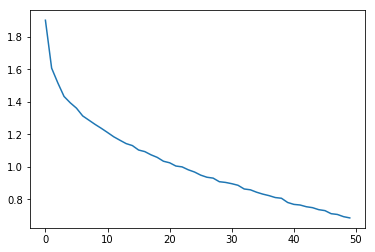

In [24]:
def convolution_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

# build the model
convmodel = convolution_model()
# Fit the model
results_conv = convmodel.fit(X_train, y_train, validation_split=0.02, epochs=50, batch_size=500, verbose=1)
plt.plot(results_conv.history['loss'])
# Final evaluation of the model
scores = convmodel.evaluate(X_test, y_test, verbose=1)
print("Convolution Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 1s 98us/step
Accuracy: 62.97%


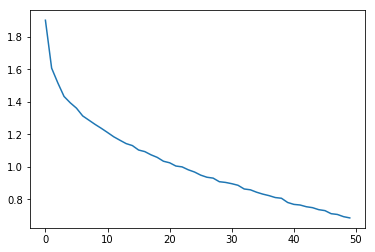

In [26]:
plt.plot(results_conv.history['loss'])
# Final evaluation of the model
scores = convmodel.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

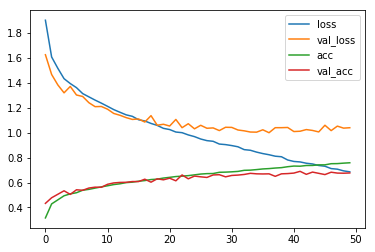

In [27]:
plt.plot(results_conv.history['loss'])
plt.plot(results_conv.history['val_loss'])
plt.plot(results_conv.history['acc'])
plt.plot(results_conv.history['val_acc'])
plt.legend(['loss','val_loss','acc','val_acc'])

In [28]:
scores

[1.0903804883003234, 0.62970000000000004]

Train on 49000 samples, validate on 1000 samples
Epoch 1/50
49000/49000 [==============================] - 8s 163us/step - loss: 1.9089 - acc: 0.3030 - val_loss: 1.5670 - val_acc: 0.4400
Epoch 2/50
49000/49000 [==============================] - 8s 154us/step - loss: 1.6095 - acc: 0.4204 - val_loss: 1.4229 - val_acc: 0.4720
Epoch 3/50
49000/49000 [==============================] - 8s 154us/step - loss: 1.4923 - acc: 0.4666 - val_loss: 1.3053 - val_acc: 0.5380
Epoch 4/50
49000/49000 [==============================] - 8s 154us/step - loss: 1.4165 - acc: 0.4943 - val_loss: 1.2655 - val_acc: 0.5560
Epoch 5/50
49000/49000 [==============================] - 8s 154us/step - loss: 1.3518 - acc: 0.5188 - val_loss: 1.1907 - val_acc: 0.5630
Epoch 6/50
49000/49000 [==============================] - 8s 154us/step - loss: 1.2895 - acc: 0.5411 - val_loss: 1.1964 - val_acc: 0.5650
Epoch 7/50
49000/49000 [==============================] - 8s 154us/step - loss: 1.2513 - acc: 0.5552 - val_loss: 1.1080 - v

10000/10000 [==============================] - 1s 116us/step


[0.95360311174392698, 0.68840000000000001]

Convolution Error with 2 hidden layers: 31.16%


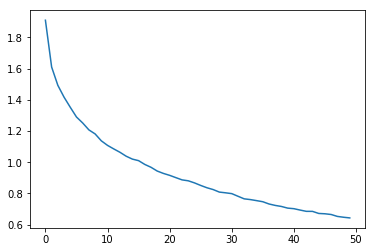

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import keras.utils 
from keras.optimizers import Adam

def convolution3_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    Adam = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])
    return model

# build the model
model3 = convolution3_model()
# Fit the model
results3 = model3.fit(X_train, y_train, validation_split=0.02, epochs=50, batch_size=500, verbose=1)
plt.plot(results3.history['loss'])
# Final evaluation of the model
scores = model3.evaluate(X_test, y_test, verbose=1)
scores
print("Convolution Error with 2 hidden layers: %.2f%%" % (100-scores[1]*100))

[0.95360311174392698, 0.68840000000000001]

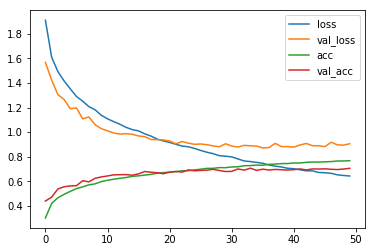

In [31]:
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.plot(results3.history['acc'])
plt.plot(results3.history['val_acc'])
plt.legend(['loss','val_loss','acc','val_acc'])
scores

Train on 49000 samples, validate on 1000 samples
Epoch 1/50
49000/49000 [==============================] - 9s 182us/step - loss: 2.2331 - acc: 0.1664 - val_loss: 2.0824 - val_acc: 0.2960
Epoch 2/50
49000/49000 [==============================] - 8s 163us/step - loss: 2.0195 - acc: 0.2409 - val_loss: 1.8551 - val_acc: 0.3920
Epoch 3/50
49000/49000 [==============================] - 8s 163us/step - loss: 1.8979 - acc: 0.2821 - val_loss: 1.7103 - val_acc: 0.4330
Epoch 4/50
49000/49000 [==============================] - 8s 163us/step - loss: 1.8279 - acc: 0.3086 - val_loss: 1.6332 - val_acc: 0.4440
Epoch 5/50
49000/49000 [==============================] - 8s 163us/step - loss: 1.7734 - acc: 0.3314 - val_loss: 1.5327 - val_acc: 0.4840
Epoch 6/50
49000/49000 [==============================] - 8s 163us/step - loss: 1.7430 - acc: 0.3372 - val_loss: 1.5169 - val_acc: 0.4960
Epoch 7/50
49000/49000 [==============================] - 8s 164us/step - loss: 1.7234 - acc: 0.3460 - val_loss: 1.4717 - v

10000/10000 [==============================] - 1s 134us/step


[1.122375894165039, 0.62419999999999998]

Convolution Error with 2 hidden layers: 37.58%


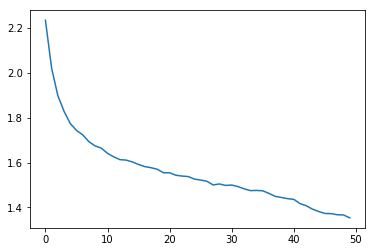

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import keras.utils 
from keras.optimizers import Adam

def convolution3a_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    Adam = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])
    return model

# build the model
model3a = convolution3a_model()
# Fit the model
results3a = model3a.fit(X_train, y_train, validation_split=0.02, epochs=50, batch_size=1000, verbose=1)
plt.plot(results3a.history['loss'])
# Final evaluation of the model
scores = model3a.evaluate(X_test, y_test, verbose=1)
scores
print("Convolution Error with 2 hidden layers: %.2f%%" % (100-scores[1]*100))

[1.122375894165039, 0.62419999999999998]

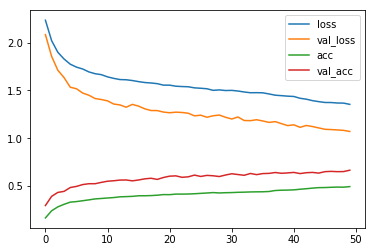

In [33]:
plt.plot(results3a.history['loss'])
plt.plot(results3a.history['val_loss'])
plt.plot(results3a.history['acc'])
plt.plot(results3a.history['val_acc'])
plt.legend(['loss','val_loss','acc','val_acc'])
scores

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import keras.utils 
from keras.optimizers import Adam

def convolution3b_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    model.summary()
    return model

# build the model
model3b = convolution3b_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 64)        0         
__________

Train on 49000 samples, validate on 1000 samples
Epoch 1/50
49000/49000 [==============================] - 16s 320us/step - loss: 1.9258 - acc: 0.2887 - val_loss: 1.9013 - val_acc: 0.3890
Epoch 2/50
49000/49000 [==============================] - 14s 292us/step - loss: 1.5948 - acc: 0.4187 - val_loss: 1.8196 - val_acc: 0.3970
Epoch 3/50
49000/49000 [==============================] - 14s 292us/step - loss: 1.4710 - acc: 0.4660 - val_loss: 1.5908 - val_acc: 0.4890
Epoch 4/50
49000/49000 [==============================] - 14s 292us/step - loss: 1.3633 - acc: 0.5088 - val_loss: 1.6126 - val_acc: 0.4670
Epoch 5/50
49000/49000 [==============================] - 14s 292us/step - loss: 1.2759 - acc: 0.5443 - val_loss: 1.4435 - val_acc: 0.5320
Epoch 6/50
49000/49000 [==============================] - 14s 292us/step - loss: 1.2139 - acc: 0.5678 - val_loss: 1.4661 - val_acc: 0.5250
Epoch 7/50
49000/49000 [==============================] - 14s 292us/step - loss: 1.1614 - acc: 0.5851 - val_loss: 1.3

10000/10000 [==============================] - 2s 179us/step


[0.98513094949722291, 0.66339999999999999]

Validation accuracy: 66.34%


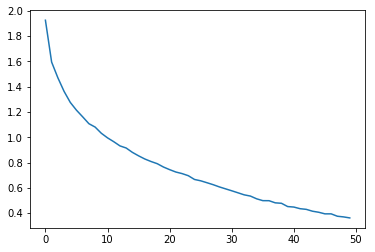

In [35]:
# Fit the model
results3b = model3b.fit(X_train, y_train, validation_split=0.02, epochs=50, batch_size=500, verbose=1)
plt.plot(results3b.history['loss'])
# Final evaluation of the model
scores = model3b.evaluate(X_test, y_test, verbose=1)
scores
print("Validation accuracy: %.2f%%" % (scores[1]*100))

[0.98513094949722291, 0.66339999999999999]

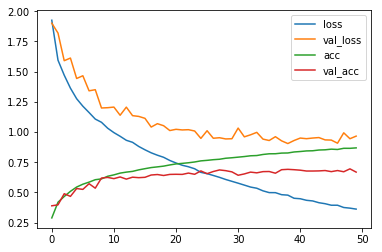

In [36]:
plt.plot(results3b.history['loss'])
plt.plot(results3b.history['val_loss'])
plt.plot(results3b.history['acc'])
plt.plot(results3b.history['val_acc'])
plt.legend(['loss','val_loss','acc','val_acc'])
scores

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import keras.utils 
from keras.optimizers import Adam

def convolution3c_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=0.0001, decay=1e-6), 
                  metrics=['accuracy'])
    model.summary()
    return model

# build the model
model3c = convolution3c_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 128)         147584    
__________

Train on 49000 samples, validate on 1000 samples
Epoch 1/250
49000/49000 [==============================] - 14s 291us/step - loss: 2.0674 - acc: 0.2279 - val_loss: 1.7849 - val_acc: 0.3600
Epoch 2/250
49000/49000 [==============================] - 14s 280us/step - loss: 1.7787 - acc: 0.3455 - val_loss: 1.7010 - val_acc: 0.4080
Epoch 3/250
49000/49000 [==============================] - 14s 280us/step - loss: 1.6933 - acc: 0.3804 - val_loss: 1.5564 - val_acc: 0.4480
Epoch 4/250
49000/49000 [==============================] - 14s 280us/step - loss: 1.6283 - acc: 0.4044 - val_loss: 1.4983 - val_acc: 0.4740
Epoch 5/250
49000/49000 [==============================] - 14s 280us/step - loss: 1.5786 - acc: 0.4277 - val_loss: 1.4384 - val_acc: 0.4890
Epoch 6/250
49000/49000 [==============================] - 14s 280us/step - loss: 1.5350 - acc: 0.4441 - val_loss: 1.3938 - val_acc: 0.4980
Epoch 7/250
49000/49000 [==============================] - 14s 281us/step - loss: 1.4938 - acc: 0.4597 - val_lo

10000/10000 [==============================] - 1s 139us/step


[0.93072165174484256, 0.67330000000000001]

Accuracy: 67.33%


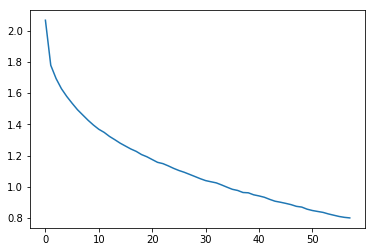

In [41]:
# Fit the model
results3c = model3c.fit(X_train, y_train, validation_split=0.02, 
                        epochs=250, 
                        batch_size=128, 
                        shuffle=True, 
                        verbose=1, 
                        callbacks=[EarlyStopping(min_delta=0.001, patience=5)])
plt.plot(results3c.history['loss'])
# Final evaluation of the model
scores = model3c.evaluate(X_test, y_test, verbose=1)
scores
print("Accuracy: %.2f%%" % (scores[1]*100))

[0.93072165174484256, 0.67330000000000001]

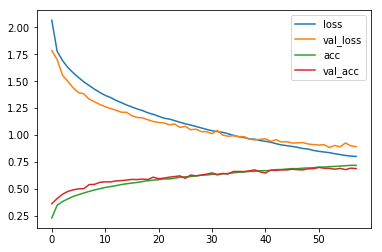

In [42]:
plt.plot(results3c.history['loss'])
plt.plot(results3c.history['val_loss'])
plt.plot(results3c.history['acc'])
plt.plot(results3c.history['val_acc'])
plt.legend(['loss','val_loss','acc','val_acc'])
scores

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import keras.utils 
from keras.optimizers import Adam

def convolution3d_model():
    # create model
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=0.001, decay=1e-6), 
                  metrics=['accuracy'])
    model.summary()
    return model

# build the model
model3d = convolution3d_model()

In [ ]:
# Fit the model
results3d = model3d.fit(X_train, y_train, validation_split=0.02, 
                        epochs=250, 
                        batch_size=128, 
                        shuffle=True, 
                        verbose=1, 
                        callbacks=[EarlyStopping(min_delta=0.0005, patience=5)])
plt.plot(results3d.history['loss'])
# Final evaluation of the model
scores = model3d.evaluate(X_test, y_test, verbose=1)
scores
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
plt.plot(results3d.history['loss'])
plt.plot(results3d.history['val_loss'])
plt.plot(results3d.history['acc'])
plt.plot(results3d.history['val_acc'])
plt.legend(['loss','val_loss','acc','val_acc'])
scores

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# X_batch, y_batch = next(datagen.flow(X_train, y_train))

In [ ]:
# 3e is the same as 3d but with image augmentation


def convolution3e_model():
    # create model
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=0.001, decay=1e-6), 
                  metrics=['accuracy'])
    model.summary()
    return model

# build the model
model3e = convolution3e_model()

In [ ]:
# Fit the model
results3e = model3e.fit_generator(datagen.flow(X_train, y_train, batch_size=32, 
                                               steps_per_epoch=len(X_train), epochs=100))


In [ ]:
plt.plot(results3e.history['loss'])
# Final evaluation of the model
scores = model3e.evaluate(X_test, y_test, verbose=1)
scores
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
plt.plot(results3e.history['loss'])
plt.plot(results3e.history['val_loss'])
plt.plot(results3e.history['acc'])
plt.plot(results3e.history['val_acc'])
plt.legend(['loss','val_loss','acc','val_acc'])
scores